In [1]:
import os
import sys

sys.path.append("/home/marsdenlab/projects/dl_template")
sys.path.append("/home/marsdenlab/projects/dl_template/scripts")
sys.path.append("/home/marsdenlab/projects/")

import json
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from xmlGroupsToJson import parse_xml 

import seg_regression.modules.io as io

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":22})

In [2]:
SPACING = 0.035
DIMS    = 128
DIMS_VEC = [DIMS, DIMS]
ORIGIN  = [0, 0]
SPACING_VEC = [SPACING, SPACING]

top_dir = "/home/marsdenlab/projects/SV/user_variation"

out_dir = '../results/user_variation'

xml_dirs = {
    "OSMSC0171": [
        top_dir+'/171_old/0171_1/Segmentations',
        top_dir+'/171_old/0171_2/Segmentations',
        top_dir+'/171_old/0171_3/Segmentations'
    ],
    
    "0144":[
        top_dir+'/0144/0144_gt/Segmentations',
        top_dir+'/0144/0144_aekaansh/Segmentations',
        top_dir+'/0144/0144_martin/Segmentations'
    ],
        "kdr":[
        top_dir+'/kdr_aekaansh/KDR33_old/Segmentations',
        top_dir+'/kdr_johnathan/KDR33_old/Segmentations',
        top_dir+'/kdr_noelia/KDR33_old/Segmentations'
    ],
        "su0259":[
        top_dir+'/pulm_ingrid/SU0259_2011_old/Segmentations',
        top_dir+'/pulm_melody/SU0259_2011_old/Segmentations',
        top_dir+'/pulm_stephanie/SU0259_2011_old/Segmentations'
    ]
}

case_files = {
    "OSMSC0171":[],
    "0144":[],
    "kdr":[],
    "su0259":[]
}

In [3]:
for case in xml_dirs:
    od = out_dir+'/'+case
    try:
        os.mkdir(od)
    except:
        print(od, " already exists")
        
    dirs = xml_dirs[case]
    
    for i in range(len(dirs)):
        odd = od+'/'+str(i)
        try:
            os.mkdir(odd)
        except:
            print(odd, " already exists")
            
        d = dirs[i]
        
        segs = os.listdir(d)
        for s in segs:
            parse_xml(d+'/'+s, odd, "a")
            
        files = os.listdir(odd)
        files = [odd+'/'+f for f in files]
        
        case_files[case] += files

../results/user_variation/OSMSC0171  already exists
../results/user_variation/OSMSC0171/0  already exists
../results/user_variation/OSMSC0171/1  already exists
../results/user_variation/OSMSC0171/2  already exists
../results/user_variation/0144  already exists
../results/user_variation/0144/0  already exists
../results/user_variation/0144/1  already exists
../results/user_variation/0144/2  already exists
../results/user_variation/kdr  already exists
../results/user_variation/kdr/0  already exists
../results/user_variation/kdr/1  already exists
../results/user_variation/kdr/2  already exists
../results/user_variation/su0259  already exists
../results/user_variation/su0259/0  already exists
../results/user_variation/su0259/1  already exists
../results/user_variation/su0259/2  already exists


In [4]:
NBOOT = 10
Np    = 20

r_means = []
r_stds  = []

NEW_SPACING = 0.035

for key,files in case_files.items():
    for file in files:
        fn = file.split('/')[-1]
        
        all_fn = [f for f in files if fn in f]
        
        radiuses = []
        
        for f in all_fn:
            jd = io.load_json(f)
            
            c = np.array(jd['contour2D'])
            inds = np.arange(c.shape[0])
            
            for i in range(NBOOT):
                    selected = np.random.choice(inds, size=Np)
                    
                    sel_pts  = c[inds]
                    
                    mu = np.mean(sel_pts,axis=0)
                    
                    sel_norm = sel_pts-mu
                    
                    sel_norm = sel_norm*NEW_SPACING/SPACING
                    
                    rs = np.sqrt(np.sum(sel_norm**2,axis=1))
                    
                    r = np.mean(rs)
                    
                    radiuses.append(r)
            
        r_means.append(np.mean(radiuses))
        r_stds.append(np.std(radiuses))
        
r_means = np.array(r_means)
r_stds   = np.array(r_stds)
r_stds_norm = r_stds/r_means

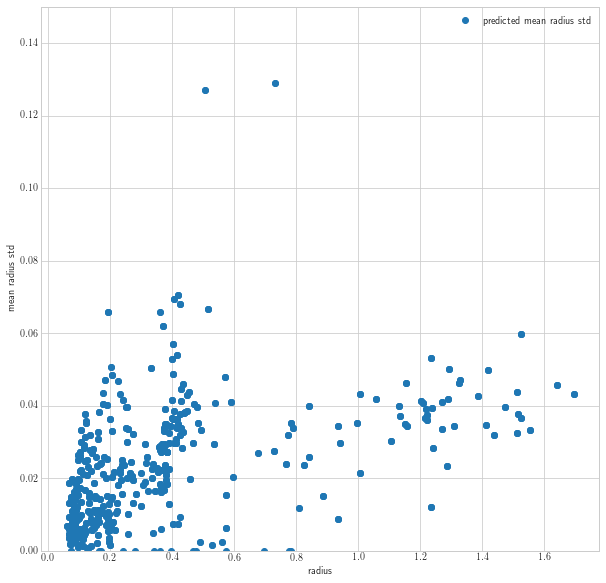

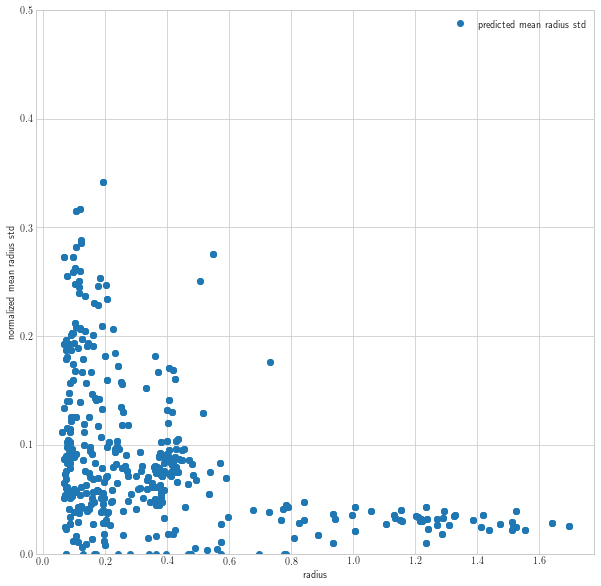

In [5]:
plt.figure(figsize=(10,10))
plt.plot(r_means, r_stds, marker='o', linestyle='', label='predicted mean radius std')
plt.legend()
plt.xlabel('radius')
plt.ylabel('mean radius std')
plt.ylim(0,0.15)
plt.savefig('radius_user_std.png', dpi=300)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(r_means, r_stds_norm, marker='o', linestyle='', label='predicted mean radius std')
plt.legend()
plt.xlabel('radius')
plt.ylabel('normalized mean radius std')
plt.ylim(0,0.5)
plt.savefig('norm_radius_user_std.png', dpi=300)
plt.show()

In [6]:
inds = r_means < 0.5
stds = r_stds_norm[inds]
print(np.mean(stds))
print(np.std(stds))

0.10196315961319857
0.06750620347484067


In [7]:
inds = r_means > 0.5
stds = r_stds_norm[inds]
print(np.mean(stds))
print(np.std(stds))

0.0401630413553943
0.0429164847105287
